# Yield Comparison

### Import Line

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from econtools.metrics import reg
import matplotlib 
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",50)
%matplotlib inline

In [2]:
d = pd.read_csv("../data/output_data/Full_Trial_Data.csv")
d2 = pd.read_csv("../data/output_data/MG2_Data.csv")
d3 = pd.read_csv("../data/output_data/MG3_Data.csv")
private2 = pd.read_csv("../data/output_data/MG2_Private.csv")
private3 = pd.read_csv("../data/output_data/MG3_Private.csv")
E = pd.read_csv("../data/output_data/entries_97_20.csv")

id_vars = ['year',"first_year",'region','location',"company_name",'variety_id',
           'company_panel_00','company_panel_95','first_il',"il_and_first_max"]
x_vars = ['type',"height",'lodging','maturity_week',\
          "seed_treated",'lodging_comb',"scn_resist",
          "GE","gddp10","ppt","soybean_rm12_JAN","corn_rm12_JAN",
          "planting_week","harvest_week",\
          "ppt_may","ppt_june","ppt_july","ppt_aug","ppt_sept"]
cols = ["yield","yield_kg"] + id_vars + x_vars

private_vars = ['year','first_year','region','location','yield','yield_kg',"height",\
                    "lodging_comb","maturity_week",\
                    "seed_treated","scn_resist","planting_week","harvest_week"]

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_35580\2618287252.py:1: DtypeWarning: Columns (13,23,24,102,103,104,106,126) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("../data/output_data/Full_Trial_Data.csv")
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_35580\2618287252.py:2: DtypeWarning: Columns (13,24,102,104,106,126) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv("../data/output_data/MG2_Data.csv")
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_35580\2618287252.py:3: DtypeWarning: Columns (5,13,24,102,104,106,126) have mixed types. Specify dtype option on import or set low_memory=False.
  d3 = pd.read_csv("../data/output_data/MG3_Data.csv")
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_35580\2618287252.py:4: DtypeWarning: Columns (20,25,62,73) have mixed types. Specify dtype option on import or set low_memory=False.
  private2 = pd.read_csv("../data/output_data/MG2_Private.csv")
C:\Use

## Participation Statistics

#### How many entries per year?

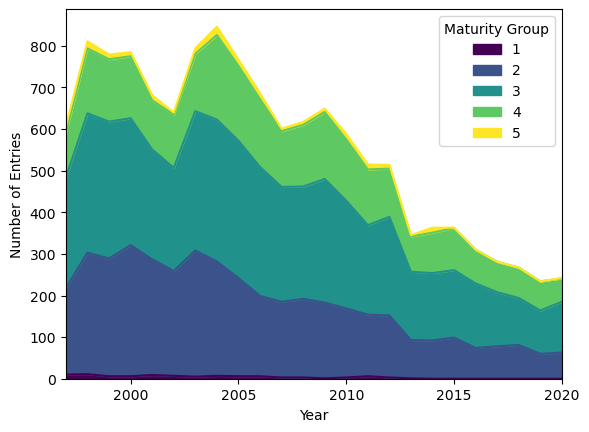

In [3]:
# Read in entries
E['mgroup'] = E.maturity.apply(lambda x: str(x).split(".")[0])

# Read in where company participated
first_il = pd.read_csv("../data/Illinois_Variety_Trials/FIRST_or_IL.csv")
E = E.merge(first_il,how="left").drop_duplicates()

m_entries = E.groupby(["year","mgroup"])['company'].count().unstack().fillna(0)
m_entries['all'] = m_entries.sum(axis=1)

m_entries.iloc[:,:-1].plot(kind='area',cmap="viridis")
plt.legend(title="Maturity Group")
plt.ylabel("Number of Entries")
plt.xlabel("Year")
# plt.title("Entries per Year")
plt.xlim(1997,2020)
plt.savefig("../figs/entries_by_mg.pdf",dpi=200,bbox_inches="tight")

#### How many companies versus how many entries? (Figure 3)

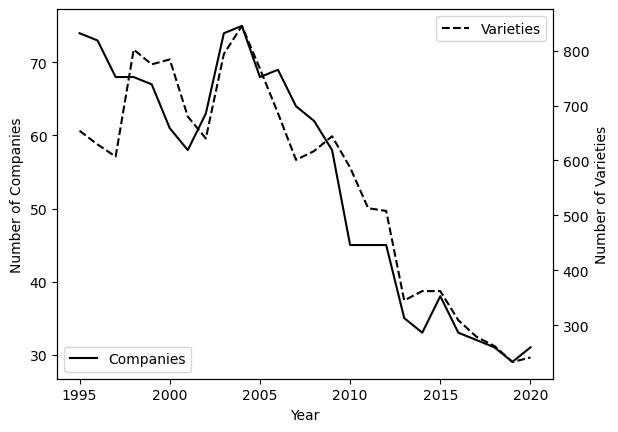

In [4]:
f,a=plt.subplots()
d.groupby("year")['company_name'].nunique().plot(ax=a,label="Companies",color="black")
plt.legend(loc="lower left")
a2 = a.twinx()
d.groupby("year")['variety_id'].nunique().plot(color="black",ls="--",ax=a2,label= "Varieties")
plt.legend()
a.set_ylabel("Number of Companies")
a2.set_ylabel("Number of Varieties")
# a.set_ylim(0,80)
# a2.set_ylim(0,900)

a.set_xlabel("Year")
# plt.title("Varieties and Companies Entering per Year")
plt.savefig("../figs/company_participation.pdf",dpi=300,bbox_inches="tight")

#### How many entries in each test plot?

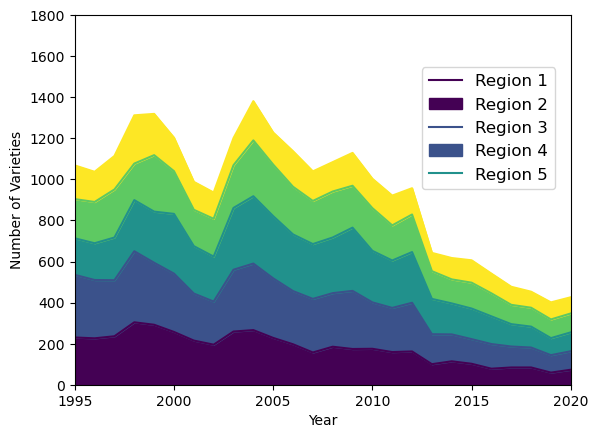

In [5]:
Entries_by_Region = d.groupby(["year","region"])["variety_id"].nunique().unstack().fillna(0)
Entries_by_Region.iloc[:,:-2].plot(kind="area",cmap="viridis")

plt.xlim(1995,2020)
# plt.legend(labels=["Region 1","Region 2","Region 3","Region 4","Region 5"])
plt.xlabel("Year")
plt.ylabel("Number of Varieties")
plt.legend(loc=(.7,.53),labels=["Region 1","Region 2","Region 3","Region 4","Region 5"],fontsize=12)
plt.ylim(0,1800)
plt.savefig("../figs/entries_by_region.pdf",dpi=300,bbox_inches="tight")

#### Which locations have planted Jack, Dwight, and Williams? (Figure 2)

In [6]:
W_matrix = d3.groupby(['year','location'])['williams'].max().unstack().fillna(0).astype(int)
D_matrix = d2.groupby(['year','location'])['dwight'].max().unstack().fillna(0).astype(int)
J_matrix = d2.groupby(['year','location'])['jack'].max().unstack().fillna(0).astype(int)

all_entries = pd.concat([J_matrix,D_matrix,W_matrix],axis=1).fillna(0)

J_matrix = all_entries.iloc[:,:15]
J_matrix['carbondale'] = 0
J_matrix['dixon_springs'] = 0

D_matrix = all_entries.iloc[:,15:30]
D_matrix['carbondale'] = 0
D_matrix['dixon_springs'] = 0

W_matrix = all_entries.iloc[:,30:]

In [7]:
loc_ordered = \
["mt_morris","dekalb","erie",\
 "monmouth","goodfield","dwight",\
 "perry","new_berlin","urbana",\
 "st_peter","belleville","brownstown",\
 "elkville","carbondale","dixon_springs"]

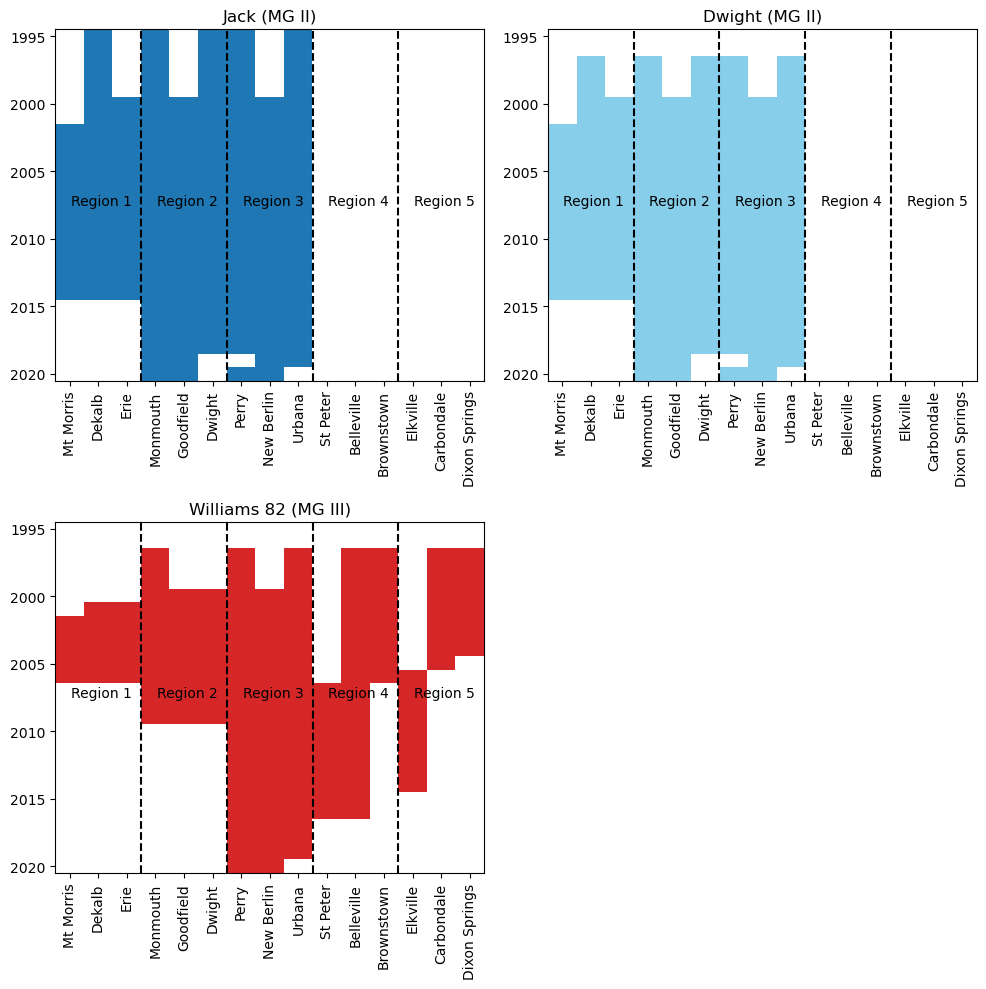

In [8]:
f,a = plt.subplots(2,2,figsize=(10,10))

a[0,0].imshow(J_matrix[loc_ordered],cmap=matplotlib.colors.ListedColormap(['white', 'C0']))
a[0,0].set_title("Jack (MG II)")
a[0,0].set_yticks([0,5,10,15,20,25])
a[0,0].set_xticks(list(range(15)))
a[0,0].set_yticklabels(["1995","2000","2005","2010","2015","2020"])
a[0,0].set_xticklabels([x.title().replace("_"," ") for x in loc_ordered],rotation=90)
a[0,0].set_aspect('auto')
a[0,0].annotate("Region 1",xy=(.05,12.5))
a[0,0].annotate("Region 2",xy=(3.05,12.5))
a[0,0].annotate("Region 3",xy=(6.05,12.5))
a[0,0].annotate("Region 4",xy=(9.05,12.5))
a[0,0].annotate("Region 5",xy=(12.05,12.5))

a[0,0].axvline(2.5,color="black",ls="--")
a[0,0].axvline(5.5,color="black",ls="--")
a[0,0].axvline(8.5,color="black",ls="--")
a[0,0].axvline(11.5,color="black",ls="--")



a[0,1].imshow(D_matrix[loc_ordered],cmap=matplotlib.colors.ListedColormap(['white', 'skyblue']))
a[0,1].set_title("Dwight (MG II)")
a[0,1].set_yticks([0,5,10,15,20,25])
a[0,1].set_yticklabels(["1995","2000","2005","2010","2015","2020"])
a[0,1].set_xticks(list(range(15)))
a[0,1].set_xticklabels([x.title().replace("_"," ") for x in loc_ordered],rotation=90)
a[0,1].set_aspect('auto')
a[0,1].axvline(2.5,color="black",ls="--")
a[0,1].axvline(5.5,color="black",ls="--")
a[0,1].axvline(8.5,color="black",ls="--")
a[0,1].axvline(11.5,color="black",ls="--")
a[0,1].annotate("Region 1",xy=(.05,12.5))
a[0,1].annotate("Region 2",xy=(3.05,12.5))
a[0,1].annotate("Region 3",xy=(6.05,12.5))
a[0,1].annotate("Region 4",xy=(9.05,12.5))
a[0,1].annotate("Region 5",xy=(12.05,12.5))


a[1,0].imshow(W_matrix[loc_ordered],cmap=matplotlib.colors.ListedColormap(['white', 'C3']))
a[1,0].set_title("Williams 82 (MG III)")
a[1,0].set_yticks([0,5,10,15,20,25])
a[1,0].set_yticklabels(["1995","2000","2005","2010","2015","2020"])
a[1,0].set_xticks(list(range(15)))
a[1,0].set_xticklabels([x.title().replace("_"," ") for x in loc_ordered],rotation=90)
a[1,0].set_aspect('auto')
a[1,0].axvline(2.5,color="black",ls="--")
a[1,0].axvline(5.5,color="black",ls="--")
a[1,0].axvline(8.5,color="black",ls="--")
a[1,0].axvline(11.5,color="black",ls="--")
a[1,0].annotate("Region 1",xy=(.05,12.5))
a[1,0].annotate("Region 2",xy=(3.05,12.5))
a[1,0].annotate("Region 3",xy=(6.05,12.5))
a[1,0].annotate("Region 4",xy=(9.05,12.5))
a[1,0].annotate("Region 5",xy=(12.05,12.5))

a[1,1].axis("off")
f.tight_layout()
plt.savefig("../figs/public_participation.pdf",dpi=300,bbox_inches="tight")

### Which maturities were planted in each region? (Table under Figure 1)

In [11]:
mat_by_region = d.groupby(["region","mgroup_entries"])['variety'].nunique().unstack()
mat_by_region = mat_by_region.iloc[:-2,:].fillna(0).astype(int)

mat_by_region.columns.name=""
mat_by_region.columns = ["MG I","MG II","MG III","MG IV","MG V"]
mat_by_region.index = ["Region 1","Region 2","Region 3","Region 4","Region 5"]

In [12]:
print(mat_by_region.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & MG I & MG II & MG III & MG IV & MG V \\
\midrule
Region 1 & 52 & 2071 & 408 & 0 & 0 \\
Region 2 & 3 & 1252 & 1909 & 31 & 0 \\
Region 3 & 3 & 486 & 2434 & 280 & 0 \\
Region 4 & 1 & 54 & 1283 & 1314 & 0 \\
Region 5 & 0 & 0 & 561 & 1341 & 107 \\
\bottomrule
\end{tabular}



### GE Adoption by MG (Figure 4)

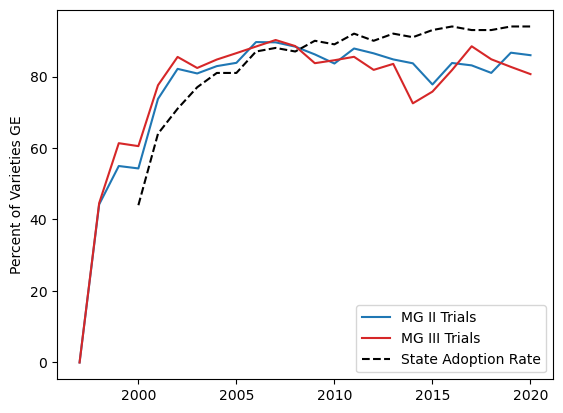

In [20]:
GE_IL = pd.read_csv("../data/NASS/IL_GE_Adoption.csv")

d['GE'] = d['GE'].astype(float)

ex = d[['company_name','company_panel_95','company_panel_00','mgroup_entries','variety_id','year','GE']].drop_duplicates()
adoption = ex.groupby(['mgroup_entries','year'])['GE'].mean().unstack().T
adoption = adoption.sort_index()[[2,3]]*100
adoption.columns = ["MG II Trials","MG III Trials"]

GE_IL.columns=["State Adoption Rate",'year']

f,a = plt.subplots()
adoption[['MG II Trials','MG III Trials']].plot(color=["C0","C3"],ax=a)
GE_IL.set_index("year").loc[2000:2020].plot(color="black",label="State Adoption Rate",ax=a,ls="--")
plt.legend()
plt.xlabel("")
plt.ylabel("Percent of Varieties GE")
plt.savefig("../figs/GE_Adoption_Rates.pdf",dpi=300,bbox_inches="tight")

In [14]:
GE_IL

,State Adoption Rate,year
0,44,2000
1,64,2001
2,71,2002
3,77,2003
4,81,2004
5,81,2005
6,87,2006
7,88,2007
8,87,2008
9,90,2009


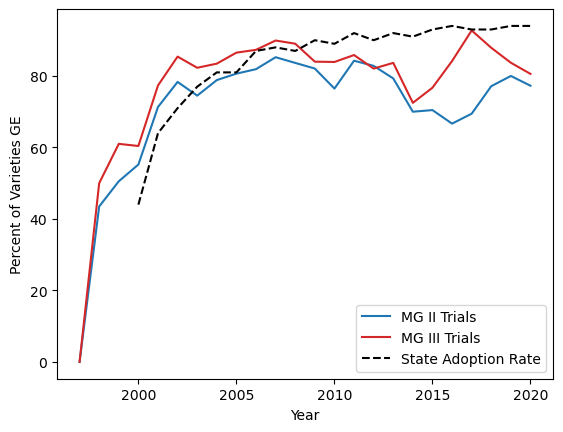

In [21]:
ex = d[(d.region=="region2")|(d.region=="region3")][['company_name','company_panel_95','company_panel_00','mgroup_entries','variety_id','year','GE']].drop_duplicates()
adoption = ex.groupby(['mgroup_entries','year'])['GE'].mean().unstack().T
adoption = adoption.sort_index()[[2,3]]*100
adoption.columns = ["MG II Trials","MG III Trials"]

GE_IL.columns=["State Adoption Rate",'year']

f,a = plt.subplots()
adoption[['MG II Trials','MG III Trials']].plot(color=["C0","C3"],ax=a)
GE_IL.set_index("year").loc[2000:2020].plot(color="black",label="State Adoption Rate",ax=a,ls="--")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percent of Varieties GE")
plt.savefig("../figs/GE_Adoption_Rates_Reg23.pdf",dpi=300,bbox_inches="tight")

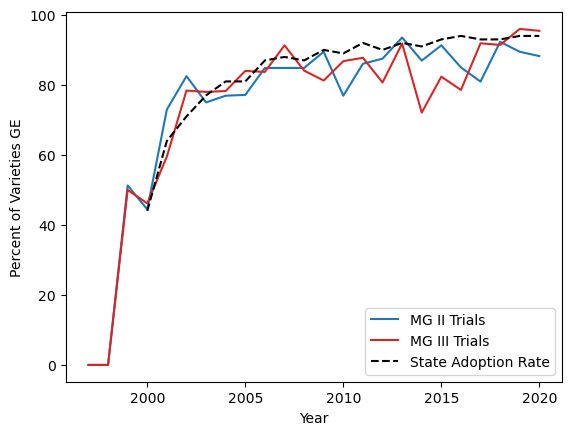

In [22]:
ex = d[['company_name','company_panel_95','company_panel_00','mgroup_entries','variety_id','year','GE']].drop_duplicates()
panel_adoption = ex[ex['company_panel_00']].groupby(['mgroup_entries','year'])['GE'].mean().unstack().T
panel_adoption = panel_adoption.sort_index()[[2,3]]*100
panel_adoption.columns = ["MG II Trials","MG III Trials"]

f,a = plt.subplots()
panel_adoption.plot(color=["C0","C3"],ax=a)
GE_IL.set_index("year").loc[2000:2020].plot(color="black",label="State Adoption Rate",ax=a,ls="--")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percent of Varieties GE")
plt.savefig("../figs/GE_Adoption_Rates_Panel.pdf",dpi=300,bbox_inches="tight")

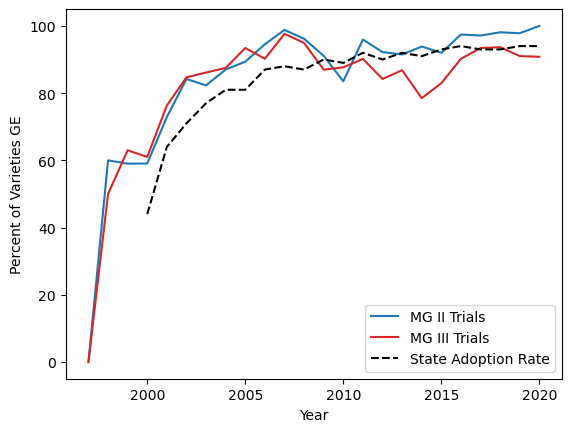

In [23]:
ex = d[['company_name','il_and_first_max','mgroup_entries','variety_id','year','GE']].drop_duplicates()
panel_adoption = ex[ex['il_and_first_max']==1].groupby(['mgroup_entries','year'])['GE'].mean().unstack().T
panel_adoption = panel_adoption.sort_index()[[2,3]]*100
panel_adoption.columns = ["MG II Trials","MG III Trials"]

f,a = plt.subplots()
panel_adoption.plot(color=["C0","C3"],ax=a)
GE_IL.set_index("year").loc[2000:2020].plot(color="black",label="State Adoption Rate",ax=a,ls="--")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percent of Varieties GE")
plt.savefig("../figs/GE_Adoption_Rates_FIRST.pdf",dpi=300,bbox_inches="tight")

## Yield Differences

### Average Differences Over Time

In [28]:
# Average over years
W = private3.groupby("first_year")['diff_kg_w'].mean()
D = private2.groupby("first_year")['diff_kg_d'].mean()
J = private2.groupby("first_year")['diff_kg_j'].mean()

# To "normalize," subtract the average yield in 1997
private2['diff_kg_d_norm'] = private2['diff_kg_d'] - D[1997]
private2['diff_kg_j_norm'] = private2['diff_kg_j'] - J[1997]
private3['diff_kg_w_norm'] = private3['diff_kg_w'] - W[1997]

# Average over years, normalize
W_norm = private3.groupby("first_year")['diff_kg_w_norm'].mean()
D_norm = private2.groupby("first_year")['diff_kg_d_norm'].mean()
J_norm = private2.groupby("first_year")['diff_kg_j_norm'].mean()

# Rolling average over five years
D_5y = D.rolling(5).mean()
J_5y = J.rolling(5).mean()
W_5y = W.rolling(5).mean()

# Normalized rolling average
J_5y_norm = J_5y - J_5y[2001]
D_5y_norm = D_5y - D_5y[2001]
W_5y_norm = W_5y - W_5y[2001]

In [29]:
# Find locations with over 21 entries 
loc_counts_d = private2.groupby(['first_year','location'])['diff_kg_d_norm'].mean().unstack().count()
D_locs = loc_counts_d[loc_counts_d>21].index

loc_counts_j = private2.groupby(['first_year','location'])['diff_kg_j_norm'].mean().unstack().count()
J_locs = loc_counts_j[loc_counts_j>21].index

loc_counts_w = private3.groupby(['first_year','location'])['diff_kg_w_norm'].mean().unstack().count()
W_locs = loc_counts_w[loc_counts_w>21].index

# Only Urbana
W_panel = private3[private3.location.isin(['urbana'])].groupby("year")['diff_kg_w_norm'].mean()
D_panel = private2[private2.location.isin(['urbana'])].groupby("year")['diff_kg_d_norm'].mean()
J_panel = private2[private2.location.isin(['urbana'])].groupby("year")['diff_kg_j_norm'].mean()

In [30]:
W_panel_5yr = W_panel.rolling(5).mean()
D_panel_5yr = D_panel.rolling(5).mean()
J_panel_5yr = J_panel.rolling(5).mean()

J_panel_5y_norm = J_panel_5yr  - J_panel_5yr [2001]
D_panel_5y_norm = D_panel_5yr  - D_panel_5yr [2001]
W_panel_5y_norm = W_panel_5yr  - W_panel_5yr [2001]

### Plotting Averages over Years (Figure 6)

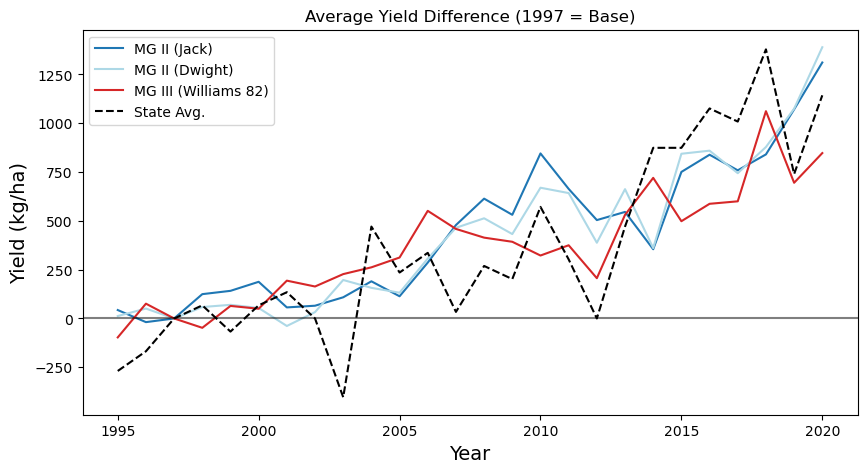

In [33]:
nass = pd.read_csv("../data/NASS/NASS_IL_Soybean_Yields.csv")#,
                 #usecols = ['Year','State ANSI','County','County ANSI','Value'])

nass.columns = [x.lower().replace(" ","_") for x in nass.columns]

# convert to metric
nass['yield'] = nass['value']* 67.25

# make a time-series 
y = nass.set_index(['year'])['yield'].sort_index()

y5yr = y.rolling(5).mean()

f,a = plt.subplots(figsize=(10,5))

# font = {'family' : 'normal',
#         'size'   : 14}

# matplotlib.rc('font', **font)

# Average diff
J_norm.plot(ax=a,color="C0",label="MG II (Jack)")
D_norm.plot(ax=a,color="lightblue",label="MG II (Dwight)")
W_norm.plot(ax=a,color="C3",label="MG III (Williams 82)")

(y - y.loc[1997]).loc[1995:2020].plot(ax=a,color="black",ls="--",label="State Avg.")
plt.legend()

plt.axhline(0,color='black',ls='-',alpha=.5)
a.set_title("Average Yield Difference (1997 = Base)")

plt.xlabel("Year",fontsize=14)
plt.ylabel("Yield (kg/ha)",fontsize=14)
plt.savefig("../figs/average_yield_by_year.pdf",dpi=300,bbox_inches="tight")

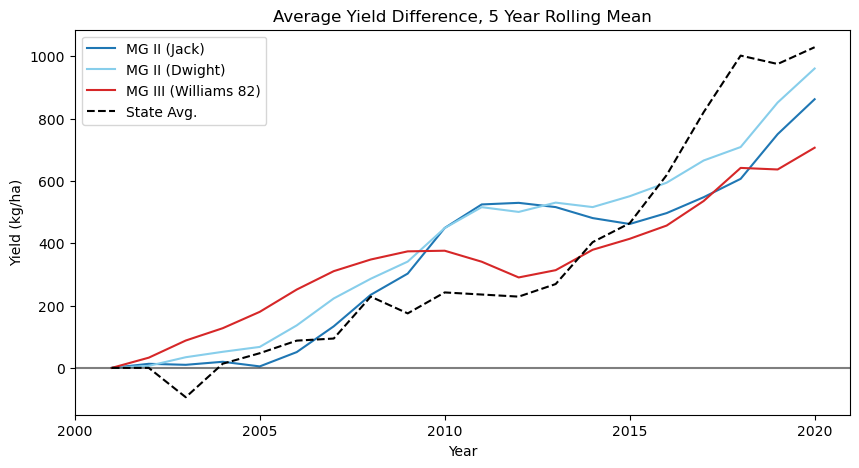

In [34]:
f,a = plt.subplots(figsize=(10,5))
J_5y_norm.loc[2001:2020].plot(ax=a,color="C0",label="MG II (Jack)")
D_5y_norm.loc[2001:2020].plot(ax=a,color="skyblue",ls="-",label="MG II (Dwight)")
W_5y_norm.loc[2001:2020].plot(ax=a,color="C3",label="MG III (Williams 82)")
plt.axhline(0,color="black",ls="-",alpha=.5)

(y5yr - y5yr.loc[2001]).loc[2001:2020].plot(ax=a,color="black",ls="--",label="State Avg.")


a.set_title("Average Yield Difference, 5 Year Rolling Mean")
plt.legend()
plt.xticks(np.arange(2000,2021,5))
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.savefig("../figs/average_yield_5y_mean.pdf",dpi=300,bbox_inches="tight")

This is much higher than the estimate from other studies, about 30 kg/ha.

### Yield Location Averages

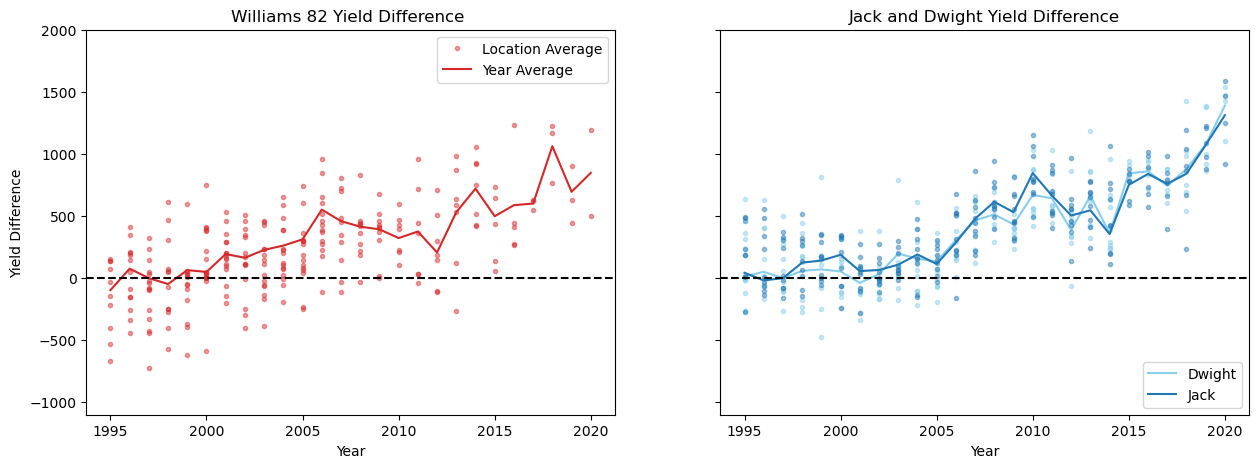

In [39]:
f,a = plt.subplots(1,2,figsize=(15,5),sharey=True)
(private2.groupby(['first_year','location'])['diff_kg_d'].mean()- D[1997]).unstack().plot(ax=a[1],color="skyblue",alpha=.45,style='.',label='_hidden')
D_norm.plot(ax=a[1],color="skyblue")
(private2.groupby(['first_year','location'])['diff_kg_j'].mean() - J[1997]).unstack().plot(ax=a[1],color="C0",alpha=.45,style='.')
J_norm.plot(ax=a[1],color="C0")
lines, labels = a[1].get_legend_handles_labels()
a[1].axhline(0,color="black",ls='--')
a[1].set_title("Jack and Dwight Yield Difference")
a[1].set_xlabel("Year")
a[1].set_ylabel("Yield Difference")
a[1].set_ylim(-1100,2000)
line_j = Line2D([0], [0], label='Jack', color='C0')
line_d = Line2D([0], [0], label='Dwight', color='skyblue')
a[1].legend([line_d,line_j],["Dwight","Jack"],loc='lower right')

(private3.groupby(['first_year','location'])['diff_kg_w'].mean() -W[1997]).unstack().plot(ax=a[0],color="C3",alpha=.45,style='.')
W_norm.plot(ax=a[0],color="C3")
lines, labels = a[0].get_legend_handles_labels()
a[0].legend(lines[-2:], ["Location Average","Year Average"])
a[0].axhline(0,color="black",ls='--')
a[0].set_title("Williams 82 Yield Difference ")
a[0].set_xlabel("Year")
a[0].set_ylabel("Yield Difference")
a[0].set_ylim(-1100,2000)

plt.savefig("../figs/year_loc_avg.pdf",dpi=300,bbox_inches="tight")


One issue with using multiple locations is that the mix changes with how many private varieties get submitted.

What if we just restricted it to one location?

In [40]:
locational_diffs3 = private3.groupby(["first_year","location"])['diff_kg_w_norm'].mean().unstack()
locational_diffs2_j = private2.groupby(["first_year","location"])['diff_kg_j_norm'].mean().unstack()
locational_diffs2_d = private2.groupby(["first_year","location"])['diff_kg_d_norm'].mean().unstack()

(-500.0, 2000.0)

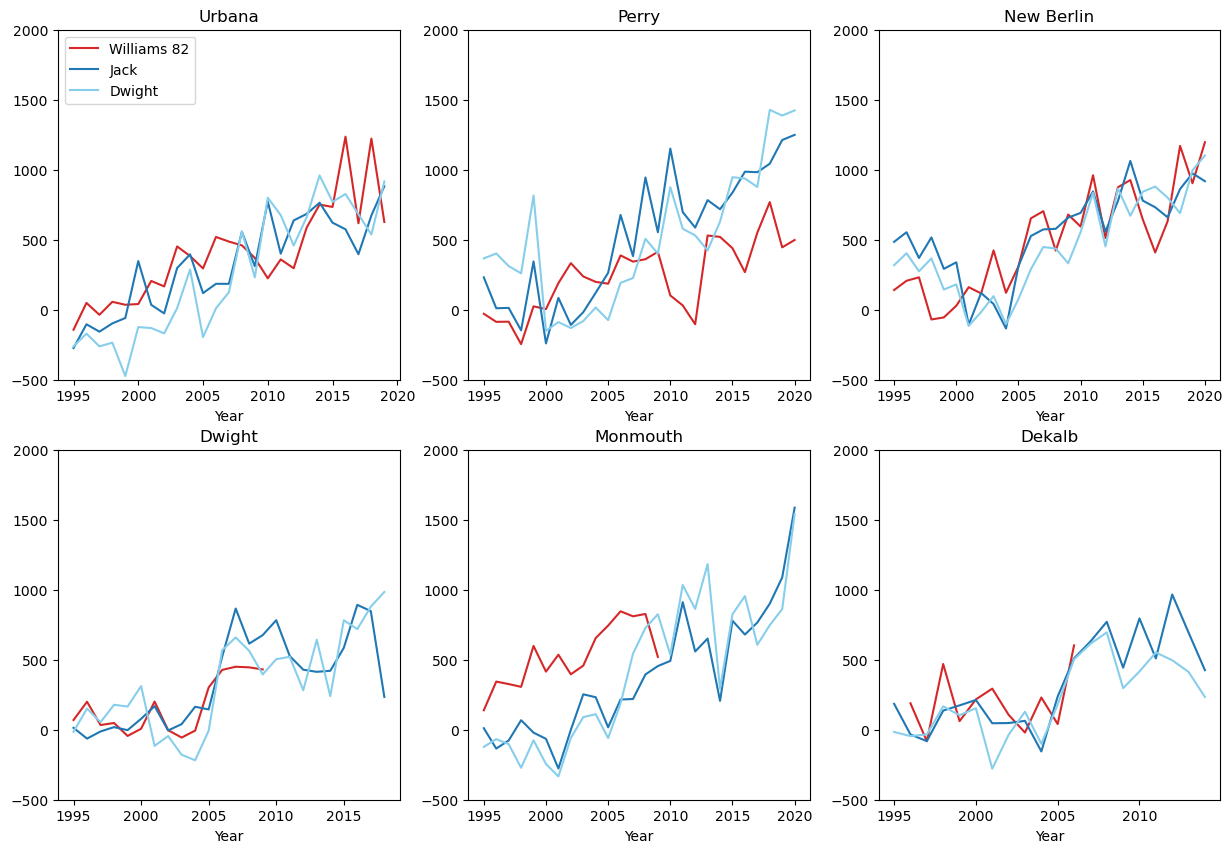

In [41]:
f,a = plt.subplots(2,3,figsize=(15,10))
locational_diffs3['urbana'].plot(ax=a[0,0],color="C3", label="Williams 82")
locational_diffs2_j['urbana'].plot(ax=a[0,0],color="C0",label="Jack")
locational_diffs2_d['urbana'].plot(ax=a[0,0],color="skyblue",label="Dwight")
a[0,0].legend(loc="upper left")
a[0,0].set_title("Urbana")
a[0,0].set_xlabel("Year")
a[0,0].set_ylim(-500,2000)

locational_diffs3['perry'].plot(ax=a[0,1],color="C3", label="Williams 82")
locational_diffs2_j['perry'].plot(ax=a[0,1],color="C0",label="Jack")
locational_diffs2_d['perry'].plot(ax=a[0,1],color="skyblue",label="Dwight")
a[0,1].set_title("Perry")
a[0,1].set_xlabel("Year")
a[0,1].set_ylim(-500,2000)

locational_diffs3['new_berlin'].plot(ax=a[0,2],color="C3", label="Williams 82")
locational_diffs2_j['new_berlin'].plot(ax=a[0,2],color="C0",label="Jack")
locational_diffs2_d['new_berlin'].plot(ax=a[0,2],color="skyblue",label="Dwight")
a[0,2].set_title("New Berlin")
a[0,2].set_xlabel("Year")
a[0,2].set_ylim(-500,2000)

locational_diffs3['dwight'].plot(ax=a[1,0],color="C3",label="Williams 82")
locational_diffs2_j['dwight'].plot(ax=a[1,0],color="C0",label="Jack")
locational_diffs2_d['dwight'].plot(ax=a[1,0],color="skyblue",label="Dwight")
a[1,0].set_title("Dwight")
a[1,0].set_xlabel("Year")
a[1,0].set_ylim(-500,2000)

locational_diffs3['monmouth'].plot(ax=a[1,1],color="C3",label="Williams 82")
locational_diffs2_j['monmouth'].plot(ax=a[1,1],color="C0",label="Jack")
locational_diffs2_d['monmouth'].plot(ax=a[1,1],color="skyblue",label="Dwight")
a[1,1].set_title("Monmouth")
a[1,1].set_xlabel("Year")
a[1,1].set_ylim(-500,2000)

locational_diffs3['dekalb'].plot(ax=a[1,2],color="C3",label="Williams 82")
locational_diffs2_j['dekalb'].plot(ax=a[1,2],color="C0",label="Jack")
locational_diffs2_d['dekalb'].plot(ax=a[1,2],color="skyblue",label="Dwight")
a[1,2].set_title("Dekalb")
a[1,2].set_xlabel("Year")
a[1,2].set_ylim(-500,2000)

## CDFs and PDFs (these didn't make it in the paper, but I think they are cool)
How have the distribution of returns changed over time?

In [42]:
def CDF(A,bins=30):
    A = A.sort_values().values
    counts, bin_edges = np.histogram(A, bins=bins, density=True)
    cdf = np.cumsum(counts)
    return pd.Series(cdf/cdf.max(),index=bin_edges[1:])

In [43]:
from matplotlib import cm

viridis = cm.get_cmap('viridis', 5)

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_35580\2410299127.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 5)


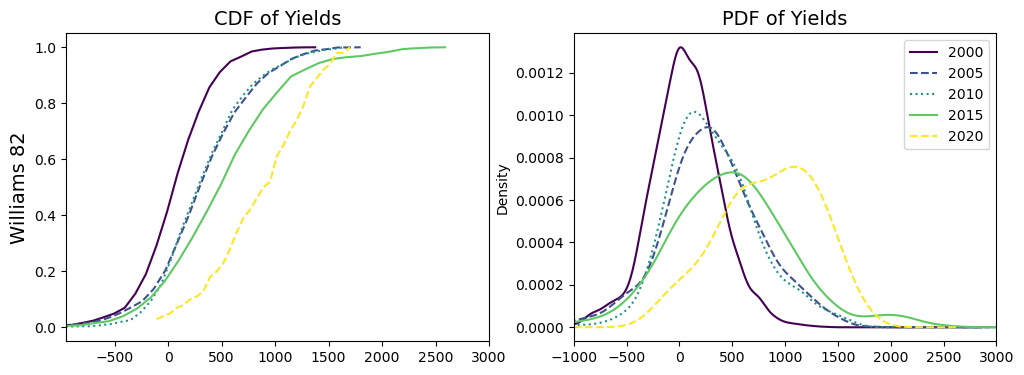

In [44]:
f,a = plt.subplots(1,2,figsize=(12,4))

a[0].set_title("CDF of Yields",fontsize=14)
a[0].set_ylabel("Williams 82",fontsize=14)
CDF(private3[private3.first_year==2000]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color=viridis(0),label="2000")
CDF(private3[private3.first_year==2005]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color=viridis(1),ls="--",label="2005")
CDF(private3[private3.first_year==2010]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color=viridis(2),ls=":",label="2010")
CDF(private3[private3.first_year==2015]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color=viridis(3),label="2015")
CDF(private3[private3.first_year==2020]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color=viridis(4),ls="--",label="2020")
a[0].set_xlim(-950,3000)

a[1].set_title("PDF of Yields",fontsize=14)
(private3[private3.first_year==2000]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color= viridis(0),label="2000")
(private3[private3.first_year==2005]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color= viridis(1),ls="--",label="2005")
(private3[private3.first_year==2010]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color= viridis(2),ls=":",label="2010")
(private3[private3.first_year==2015]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color= viridis(3),label="2015")
(private3[private3.first_year==2020]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color= viridis(4),ls="--",label="2020")
a[1].set_xlim(-1000,3000)
plt.legend()
plt.savefig("../figs/williams_cdf.pdf",dpi=200,bbox_inches="tight")


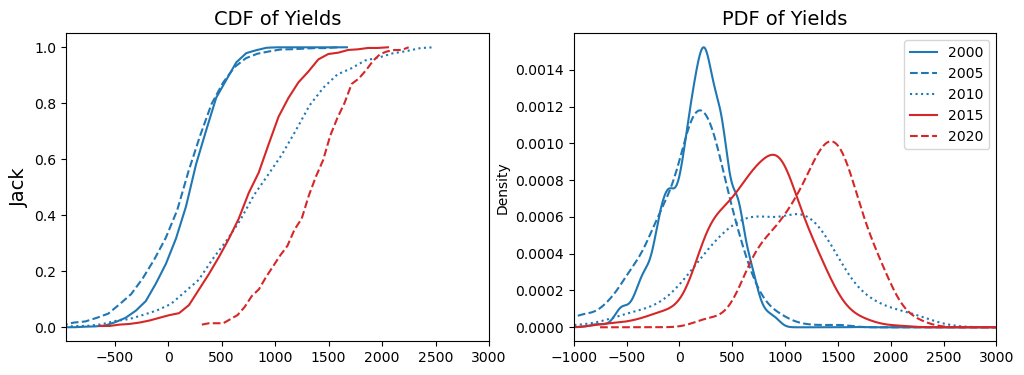

In [45]:
f,a = plt.subplots(1,2,figsize=(12,4))

a[0].set_title("CDF of Yields",fontsize=14)
a[0].set_ylabel("Jack",fontsize=14)
CDF(private2[private2.first_year==2000]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[0],color="C0",label="2000")
CDF(private2[private2.first_year==2005]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[0],color="C0",ls="--",label="2005")
CDF(private2[private2.first_year==2010]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[0],color="C0",ls=":",label="2010")
CDF(private2[private2.first_year==2015]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[0],color="C3",label="2015")
CDF(private2[private2.first_year==2020]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[0],color="C3",ls="--",label="2020")
a[0].set_xlim(-950,3000)


a[1].set_title("PDF of Yields",fontsize=14)
(private2[private2.first_year==2000]['diff_kg_j_norm'].dropna()).plot(ax=a[1],kind="density",color="C0",label="2000")
(private2[private2.first_year==2005]['diff_kg_j_norm'].dropna()).plot(ax=a[1],kind="density",color="C0",ls="--",label="2005")
(private2[private2.first_year==2010]['diff_kg_j_norm'].dropna()).plot(ax=a[1],kind="density",color="C0",ls=":",label="2010")
(private2[private2.first_year==2015]['diff_kg_j_norm'].dropna()).plot(ax=a[1],kind="density",color="C3",label="2015")
(private2[private2.first_year==2020]['diff_kg_j_norm'].dropna()).plot(ax=a[1],kind="density",color="C3",ls="--",label="2020")
a[1].set_xlim(-1000,3000)
plt.legend()

plt.savefig("../figs/jack_cdf.pdf",dpi=200,bbox_inches="tight")


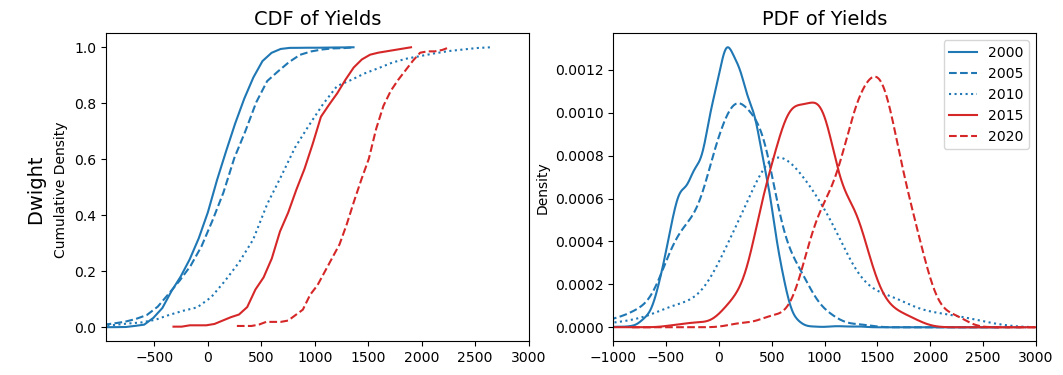

In [46]:
f,a = plt.subplots(1,2,figsize=(12,4))

a[0].set_title("CDF of Yields",fontsize=14)
a[0].set_ylabel("Dwight \n",fontsize=14)
a[0].annotate("Cumulative Density",xy=(0.045,0.3),xycoords='figure fraction',rotation=90)
CDF(private2[private2.first_year==2000]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[0],color="C0",label="2000")
CDF(private2[private2.first_year==2005]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[0],color="C0",ls="--",label="2005")
CDF(private2[private2.first_year==2010]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[0],color="C0",ls=":",label="2010")
CDF(private2[private2.first_year==2015]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[0],color="C3",label="2015")
CDF(private2[private2.first_year==2020]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[0],color="C3",ls="--",label="2020")
a[0].set_xlim(-950,3000)


a[1].set_title("PDF of Yields",fontsize=14)
(private2[private2.first_year==2000]['diff_kg_d_norm'].dropna()).plot(ax=a[1],kind="density",color="C0",label="2000")
(private2[private2.first_year==2005]['diff_kg_d_norm'].dropna()).plot(ax=a[1],kind="density",color="C0",ls="--",label="2005")
(private2[private2.first_year==2010]['diff_kg_d_norm'].dropna()).plot(ax=a[1],kind="density",color="C0",ls=":",label="2010")
(private2[private2.first_year==2015]['diff_kg_d_norm'].dropna()).plot(ax=a[1],kind="density",color="C3",label="2015")
(private2[private2.first_year==2020]['diff_kg_d_norm'].dropna()).plot(ax=a[1],kind="density",color="C3",ls="--",label="2020")
a[1].set_xlim(-1000,3000)
plt.legend()

plt.savefig("../figs/dwight_cdf.pdf",dpi=200,bbox_inches="tight")


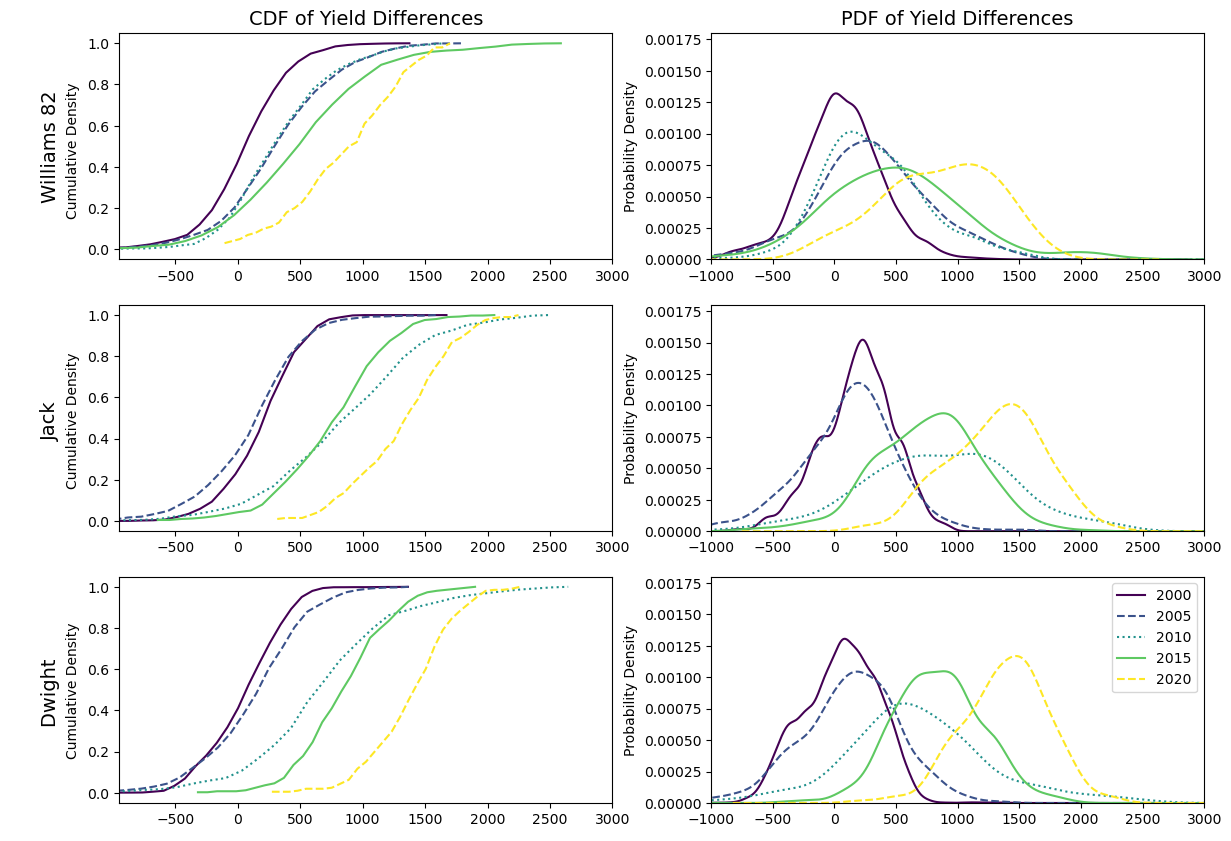

In [47]:
f,a = plt.subplots(3,2,figsize=(14,10))
# plt.rc('text', usetex=True)

a[0,0].set_title("CDF of Yield Differences",fontsize=14)
a[0,0].set_ylabel("Williams 82"+ "\n ",fontsize=14)
a[0,0].annotate("Cumulative Density",xy=(0.047,.625),xycoords='figure fraction',rotation=90)
CDF(private3[private3.first_year==2000]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color=viridis(0),label="2000")
CDF(private3[private3.first_year==2005]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color=viridis(1),ls="--",label="2005")
CDF(private3[private3.first_year==2010]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color=viridis(2),ls=":",label="2010")
CDF(private3[private3.first_year==2015]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color=viridis(3),label="2015")
CDF(private3[private3.first_year==2020]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color=viridis(4),ls="--",label="2020")
a[0,0].set_xlim(-950,3000)

a[1,0].set_ylabel("Jack \n",fontsize=14)
a[0,0].annotate("Cumulative Density",xy=(0.047,.355),xycoords='figure fraction',rotation=90)

CDF(private2[private2.first_year==2000]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[1,0],color=viridis(0),label="2000")
CDF(private2[private2.first_year==2005]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[1,0],color=viridis(1),ls="--",label="2005")
CDF(private2[private2.first_year==2010]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[1,0],color=viridis(2),ls=":",label="2010")
CDF(private2[private2.first_year==2015]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[1,0],color=viridis(3),label="2015")
CDF(private2[private2.first_year==2020]['diff_kg_j_norm'].dropna(),bins=30).plot(ax=a[1,0],color=viridis(4),ls="--",label="2020")
a[1,0].set_xlim(-950,3000)

a[2,0].set_ylabel("Dwight \n",fontsize=14)
a[0,0].annotate("Cumulative Density",xy=(0.047,.085),xycoords='figure fraction',rotation=90)

CDF(private2[private2.first_year==2000]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[2,0],color=viridis(0),label="2000")
CDF(private2[private2.first_year==2005]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[2,0],color=viridis(1),ls="--",label="2005")
CDF(private2[private2.first_year==2010]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[2,0],color=viridis(2),ls=":",label="2010")
CDF(private2[private2.first_year==2015]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[2,0],color=viridis(3),label="2015")
CDF(private2[private2.first_year==2020]['diff_kg_d_norm'].dropna(),bins=30).plot(ax=a[2,0],color=viridis(4),ls="--",label="2020")
a[2,0].set_xlim(-950,3000)

a[0,1].set_title("PDF of Yield Differences",fontsize=14)

(private3[private3.first_year==2000]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color=viridis(0),label="2000")
(private3[private3.first_year==2005]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color=viridis(1),ls="--",label="2005")
(private3[private3.first_year==2010]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color=viridis(2),ls=":",label="2010")
(private3[private3.first_year==2015]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color=viridis(3),label="2015")
(private3[private3.first_year==2020]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color=viridis(4),ls="--",label="2020")
a[0,1].set_xlim(-1000,3000)
a[0,1].set_ylim(0,.0018)

a[0,1].set_ylabel("Probability Density")

(private2[private2.first_year==2000]['diff_kg_j_norm'].dropna()).plot(ax=a[1,1],kind="density",color=viridis(0),label="2000")
(private2[private2.first_year==2005]['diff_kg_j_norm'].dropna()).plot(ax=a[1,1],kind="density",color=viridis(1),ls="--",label="2005")
(private2[private2.first_year==2010]['diff_kg_j_norm'].dropna()).plot(ax=a[1,1],kind="density",color=viridis(2),ls=":",label="2010")
(private2[private2.first_year==2015]['diff_kg_j_norm'].dropna()).plot(ax=a[1,1],kind="density",color=viridis(3),label="2015")
(private2[private2.first_year==2020]['diff_kg_j_norm'].dropna()).plot(ax=a[1,1],kind="density",color=viridis(4),ls="--",label="2020")
a[1,1].set_xlim(-1000,3000)
a[1,1].set_ylabel("Probability Density")
a[1,1].set_ylim(0,.0018)

(private2[private2.first_year==2000]['diff_kg_d_norm'].dropna()).plot(ax=a[2,1],kind="density",color=viridis(0),label="2000")
(private2[private2.first_year==2005]['diff_kg_d_norm'].dropna()).plot(ax=a[2,1],kind="density",color=viridis(1),ls="--",label="2005")
(private2[private2.first_year==2010]['diff_kg_d_norm'].dropna()).plot(ax=a[2,1],kind="density",color=viridis(2),ls=":",label="2010")
(private2[private2.first_year==2015]['diff_kg_d_norm'].dropna()).plot(ax=a[2,1],kind="density",color=viridis(3),label="2015")
(private2[private2.first_year==2020]['diff_kg_d_norm'].dropna()).plot(ax=a[2,1],kind="density",color=viridis(4),ls="--",label="2020")
a[2,1].set_xlim(-1000,3000)
a[2,1].set_ylabel("Probability Density")
a[2,1].set_ylim(0,.0018)

plt.legend()
plt.savefig("../figs/CDF_PDF.pdf",dpi=300,bbox_inches="tight")

## Mean and Median

Text(0.5, 1.0, 'Jack')

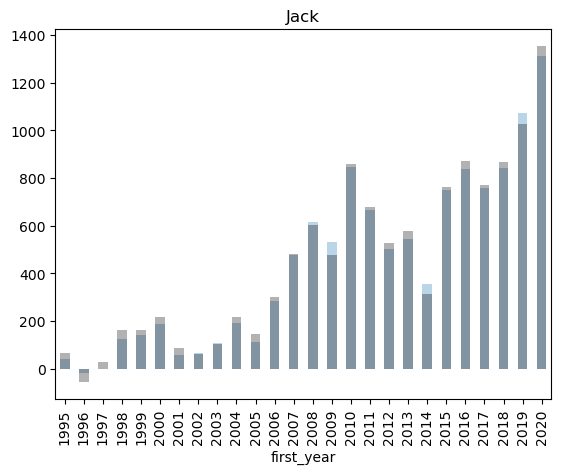

In [48]:
mu = private2.groupby("first_year")['diff_kg_j_norm'].mean()
median = private2.groupby("first_year")['diff_kg_j_norm'].median()
f,a = plt.subplots()
mu.plot(kind="bar",alpha=.3,ax=a)
median.plot(kind='bar',ls='--',color='black',alpha=.3,ax=a)
plt.title("Jack")

Text(0.5, 1.0, 'Williams 82')

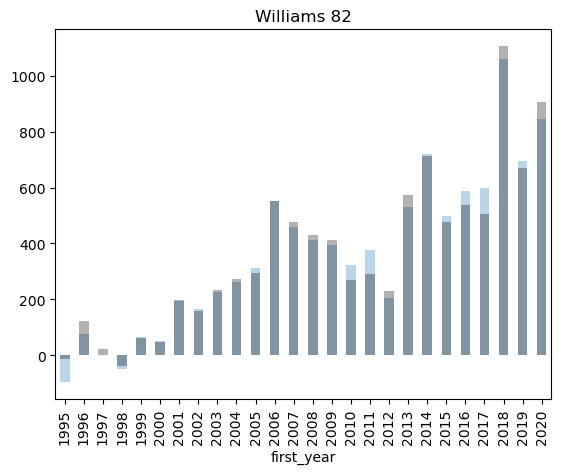

In [49]:
mu = private3.groupby("first_year")['diff_kg_w_norm'].mean()
median = private3.groupby("first_year")['diff_kg_w_norm'].median()
f,a = plt.subplots()
mu.plot(kind="bar",alpha=.3,ax=a)
median.plot(kind='bar',ls='--',color='black',alpha=.3,ax=a)
plt.title("Williams 82")

Text(0.5, 1.0, 'Dwight')

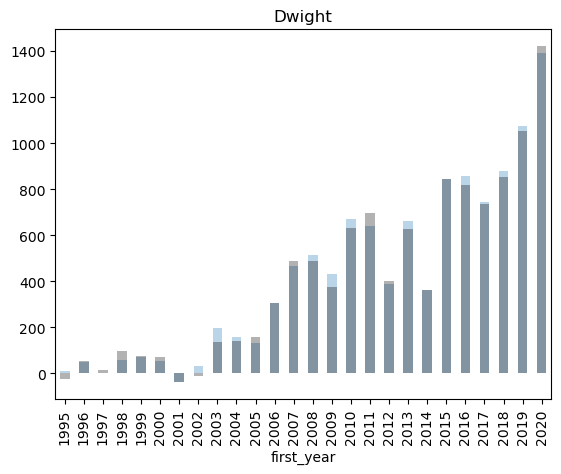

In [50]:
mu = private2.groupby("first_year")['diff_kg_d_norm'].mean()
median = private2.groupby("first_year")['diff_kg_d_norm'].median()
f,a = plt.subplots()
mu.plot(kind="bar",alpha=.3,ax=a)
median.plot(kind='bar',ls='--',color='black',alpha=.3,ax=a)
plt.title("Dwight")

## Conventional vs. Non-Conventional (GE)

In [51]:
private2.loc[private2['GE'].fillna(False),"CV_GE"] = "GE"
private2.loc[~private2['GE'].fillna(False),"CV_GE"] = "CV" 

private3.loc[private3['GE'].fillna(False),"CV_GE"] = "GE"
private3.loc[~private3['GE'].fillna(False),"CV_GE"] = "CV" 

In [52]:
private2['GE'] = (private2['GE'].fillna(False)).astype(int)
private2['GE_by_year'] = private2['GE']*private2['first_year']

private3['GE'] = (private3['GE'].fillna(False)).astype(int)
private3['GE_by_year'] = private3['GE']*private2['first_year']

### Graphs

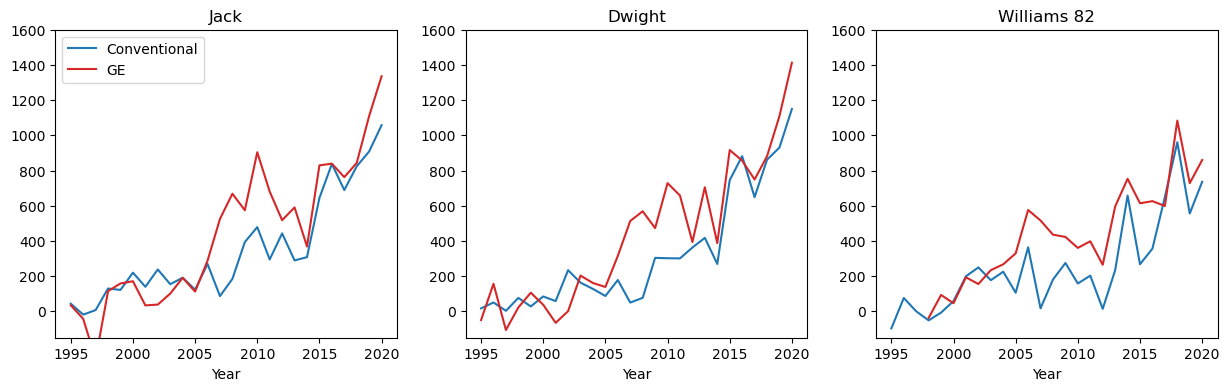

In [53]:
f,a = plt.subplots(1,3,figsize=(15,4))
private2.groupby(['first_year','CV_GE'])['diff_kg_j_norm'].mean().unstack().plot(ax=a[0],color=["C0","C3"])
a[0].set_title("Jack")
a[0].set_ylim(-150,1600)
a[0].legend(labels=["Conventional","GE"],title="",loc="upper left")
a[0].set_xlabel("Year")

private2.groupby(['first_year','CV_GE'])['diff_kg_d_norm'].mean().unstack().plot(ax=a[1],color=["C0","C3"])
a[1].set_title("Dwight")
a[1].set_ylim(-150,1600)
a[1].get_legend().remove()
a[1].set_xlabel("Year")

private3.groupby(['first_year','CV_GE'])['diff_kg_w_norm'].mean().unstack().plot(ax=a[2],color=["C0","C3"])
a[2].set_title("Williams 82")
a[2].set_ylim(-150,1600)
a[2].get_legend().remove()
a[2].set_xlabel("Year")

plt.savefig("../figs/cv_ge.pdf",dpi=200,bbox_inches="tight")


In [54]:
J_CV_GE = private2.groupby(['first_year','CV_GE'])['diff_kg_j_norm'].mean().reset_index()
J_CV_GE['GE'] = (J_CV_GE['CV_GE']=="GE").astype(int)
J_CV_GE['GE_by_year'] = J_CV_GE['GE']*J_CV_GE['first_year']

D_CV_GE = private2.groupby(['first_year','CV_GE'])['diff_kg_d_norm'].mean().reset_index()
D_CV_GE['GE'] = (D_CV_GE['CV_GE']=="GE").astype(int)
D_CV_GE['GE_by_year'] = D_CV_GE['GE']*D_CV_GE['first_year']

W_CV_GE = private3.groupby(['first_year','CV_GE'])['diff_kg_w_norm'].mean().reset_index()
W_CV_GE['GE'] = (W_CV_GE['CV_GE']=="GE").astype(int)
W_CV_GE['GE_by_year'] = W_CV_GE['GE']*W_CV_GE['first_year']

### PDFs and CDFs

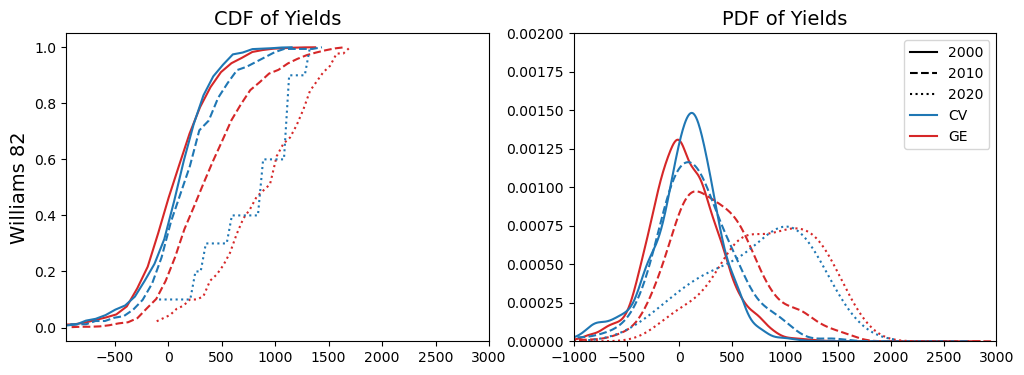

In [55]:
f,a = plt.subplots(1,2,figsize=(12,4))


a[0].set_title("CDF of Yields",fontsize=14)
a[0].set_ylabel("Williams 82",fontsize=14)
CDF(private3[(private3.first_year==2000)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",label="2000, GE")
CDF(private3[(private3.first_year==2000)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",label="2000, CV")
CDF(private3[(private3.first_year==2010)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",ls="--",label="2010, GE")
CDF(private3[(private3.first_year==2010)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",ls="--",label="2010, CV")
CDF(private3[(private3.first_year==2020)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",ls=":",label="2020, GE")
CDF(private3[(private3.first_year==2020)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",ls=":",label="2020, CV")
a[0].set_xlim(-950,3000)
# a[0].get_legend().remove()


a[1].set_title("PDF of Yields",fontsize=14)
(private3[(private3.first_year==2000)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",label='_nolegend_')
(private3[(private3.first_year==2000)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",label='_nolegend_')
(private3[(private3.first_year==2010)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",ls="--",label='_nolegend_')
(private3[(private3.first_year==2010)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",ls="--",label='_nolegend_')
(private3[(private3.first_year==2020)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",ls=":",label='_nolegend_')
(private3[(private3.first_year==2020)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",ls=":",label='_nolegend_')
a[1].set_xlim(-1000,3000)
a[1].set_ylim(0,.002)

a[1].set_ylabel("")

a[1].plot([0],[0],color="black",label="2000")
a[1].plot([0],[0],color="black",ls="--",label="2010")
a[1].plot([0],[0],color="black",ls=":",label="2020")

a[1].plot([0],[0],color="C0",label="CV")
a[1].plot([0],[0],color="C3",label="GE")

a[1].legend()
plt.savefig("../figs/williams_ge_cdf.pdf",dpi=200,bbox_inches="tight")


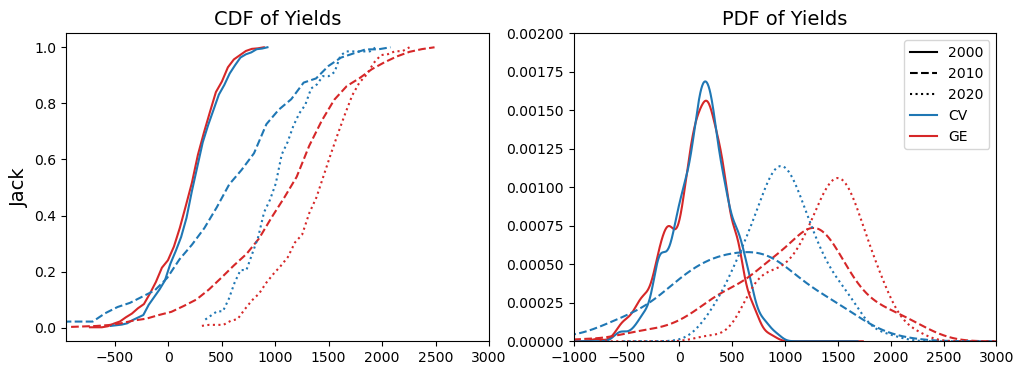

In [56]:
f,a = plt.subplots(1,2,figsize=(12,4))


a[0].set_title("CDF of Yields",fontsize=14)
a[0].set_ylabel("Jack",fontsize=14)
CDF(private2[(private2.year==2000)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",label="2000, GE")
CDF(private2[(private2.year==2000)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",label="2000, CV")
CDF(private2[(private2.year==2010)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",ls="--",label="2010, GE")
CDF(private2[(private2.year==2010)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",ls="--",label="2010, CV")
CDF(private2[(private2.year==2020)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",ls=":",label="2020, GE")
CDF(private2[(private2.year==2020)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",ls=":",label="2020, CV")
a[0].set_xlim(-950,3000)
# a[0].get_legend().remove()


a[1].set_title("PDF of Yields",fontsize=14)
(private2[(private2.year==2000)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",label='_nolegend_')
(private2[(private2.year==2000)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",label='_nolegend_')
(private2[(private2.year==2010)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",ls="--",label='_nolegend_')
(private2[(private2.year==2010)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",ls="--",label='_nolegend_')
(private2[(private2.year==2020)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",ls=":",label='_nolegend_')
(private2[(private2.year==2020)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",ls=":",label='_nolegend_')
a[1].set_xlim(-1000,3000)
a[1].set_ylim(0,.002)

a[1].set_ylabel("")

a[1].plot([0],[0],color="black",label="2000")
a[1].plot([0],[0],color="black",ls="--",label="2010")
a[1].plot([0],[0],color="black",ls=":",label="2020")

a[1].plot([0],[0],color="C0",label="CV")
a[1].plot([0],[0],color="C3",label="GE")

a[1].legend()
plt.savefig("../figs/jack_ge_cdf.pdf",dpi=200,bbox_inches="tight")


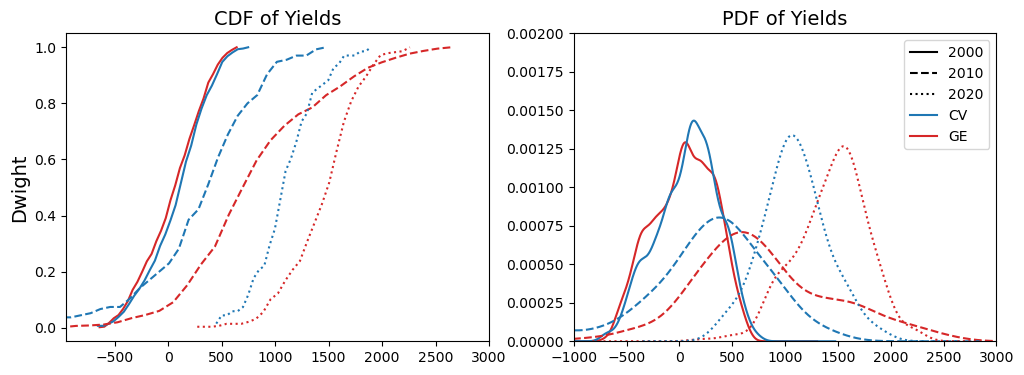

In [57]:
f,a = plt.subplots(1,2,figsize=(12,4))


a[0].set_title("CDF of Yields",fontsize=14)
a[0].set_ylabel("Dwight",fontsize=14)
CDF(private2[(private2.year==2000)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",label="2000, GE")
CDF(private2[(private2.year==2000)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",label="2000, CV")
CDF(private2[(private2.year==2010)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",ls="--",label="2010, GE")
CDF(private2[(private2.year==2010)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",ls="--",label="2010, CV")
CDF(private2[(private2.year==2020)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[0],color="C3",ls=":",label="2020, GE")
CDF(private2[(private2.year==2020)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[0],color="C0",ls=":",label="2020, CV")
a[0].set_xlim(-950,3000)
# a[0].get_legend().remove()


a[1].set_title("PDF of Yields",fontsize=14)
(private2[(private2.year==2000)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",label='_nolegend_')
(private2[(private2.year==2000)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",label='_nolegend_')
(private2[(private2.year==2010)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",ls="--",label='_nolegend_')
(private2[(private2.year==2010)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",ls="--",label='_nolegend_')
(private2[(private2.year==2020)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ).plot(ax=a[1],kind="density",color="C3",ls=":",label='_nolegend_')
(private2[(private2.year==2020)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ).plot(ax=a[1],kind="density",color="C0",ls=":",label='_nolegend_')
a[1].set_xlim(-1000,3000)
a[1].set_ylim(0,.002)

a[1].set_ylabel("")

a[1].plot([0],[0],color="black",label="2000")
a[1].plot([0],[0],color="black",ls="--",label="2010")
a[1].plot([0],[0],color="black",ls=":",label="2020")

a[1].plot([0],[0],color="C0",label="CV")
a[1].plot([0],[0],color="C3",label="GE")

a[1].legend()
plt.savefig("../figs/dwight_ge_cdf.pdf",dpi=200,bbox_inches="tight")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


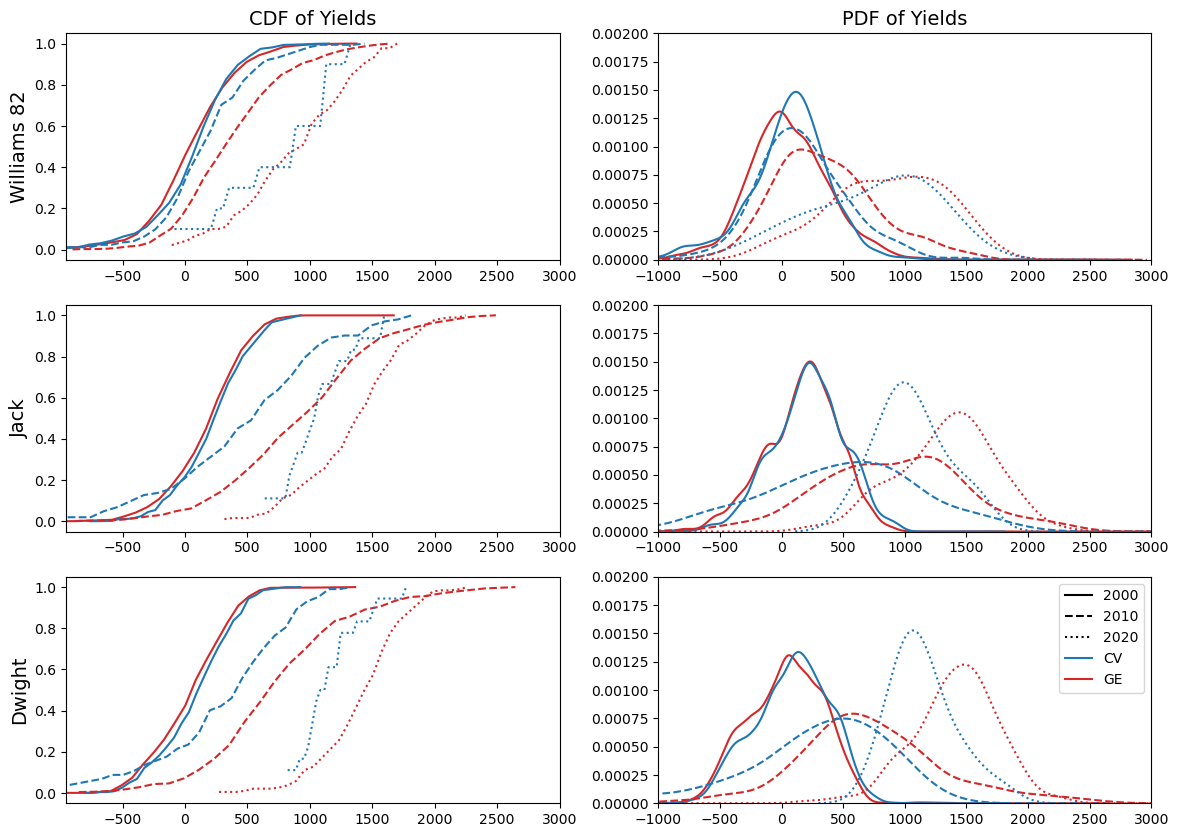

In [58]:
f,a = plt.subplots(3,2,figsize=(14,10))

a[0,0].set_title("CDF of Yields",fontsize=14)
a[0,0].set_ylabel("Williams 82",fontsize=14)
CDF(private3[(private3.first_year==2000)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color="C3",label="2000, GE")
CDF(private3[(private3.first_year==2000)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color="C0",label="2000, CV")
CDF(private3[(private3.first_year==2010)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color="C3",ls="--",label="2010, GE")
CDF(private3[(private3.first_year==2010)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color="C0",ls="--",label="2010, CV")
CDF(private3[(private3.first_year==2020)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color="C3",ls=":",label="2020, GE")
CDF(private3[(private3.first_year==2020)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ,bins=30).plot(ax=a[0,0],color="C0",ls=":",label="2020, CV")
a[0,0].set_xlim(-950,3000)
plt.legend()
a[1,0].set_ylabel("Jack",fontsize=14)
CDF(private2[(private2.first_year==2000)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[1,0],color="C3",label="2000, GE")
CDF(private2[(private2.first_year==2000)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[1,0],color="C0",label="2000, CV")
CDF(private2[(private2.first_year==2010)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[1,0],color="C3",ls="--",label="2010, GE")
CDF(private2[(private2.first_year==2010)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[1,0],color="C0",ls="--",label="2010, CV")
CDF(private2[(private2.first_year==2020)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[1,0],color="C3",ls=":",label="2020, GE")
CDF(private2[(private2.first_year==2020)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ,bins=30).plot(ax=a[1,0],color="C0",ls=":",label="2020, CV")
a[1,0].set_xlim(-950,3000)

a[2,0].set_ylabel("Dwight",fontsize=14)
CDF(private2[(private2.first_year==2000)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[2,0],color="C3",label="2000, GE")
CDF(private2[(private2.first_year==2000)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[2,0],color="C0",label="2000, CV")
CDF(private2[(private2.first_year==2010)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[2,0],color="C3",ls="--",label="2010, GE")
CDF(private2[(private2.first_year==2010)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[2,0],color="C0",ls="--",label="2010, CV")
CDF(private2[(private2.first_year==2020)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[2,0],color="C3",ls=":",label="2020, GE")
CDF(private2[(private2.first_year==2020)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ,bins=30).plot(ax=a[2,0],color="C0",ls=":",label="2020, CV")
a[2,0].set_xlim(-950,3000)

a[0,1].set_title("PDF of Yields",fontsize=14)
(private3[(private3.first_year==2000)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color="C3",label="2000, GE")
(private3[(private3.first_year==2000)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color="C0",label="2000, CV")
(private3[(private3.first_year==2010)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color="C3",ls="--",label="2010, GE")
(private3[(private3.first_year==2010)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color="C0",ls="--",label="2010, CV")
(private3[(private3.first_year==2020)&(private3.GE==1)]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color="C3",ls=":",label="2020, GE")
(private3[(private3.first_year==2020)&(private3.GE==0)]['diff_kg_w_norm'].dropna() ).plot(ax=a[0,1],kind="density",color="C0",ls=":",label="2020, CV")
a[0,1].set_xlim(-1000,3000)
a[0,1].set_ylim(0,.002)

a[0,1].set_ylabel("")

(private2[(private2.first_year==2000)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1,1],kind="density",color="C3",label="2000, GE")
(private2[(private2.first_year==2000)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1,1],kind="density",color="C0",label="2000, CV")
(private2[(private2.first_year==2010)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1,1],kind="density",color="C3",ls="--",label="2010, GE")
(private2[(private2.first_year==2010)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1,1],kind="density",color="C0",ls="--",label="2010, CV")
(private2[(private2.first_year==2020)&(private2.GE==1)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1,1],kind="density",color="C3",ls=":",label="2020, GE")
(private2[(private2.first_year==2020)&(private2.GE==0)]['diff_kg_j_norm'].dropna() ).plot(ax=a[1,1],kind="density",color="C0",ls=":",label="2020, CV")
a[1,1].set_xlim(-1000,3000)
a[1,1].set_ylim(0,.002)

a[1,1].set_ylabel("")

(private2[(private2.first_year==2000)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ).plot(ax=a[2,1],kind="density",color="C3", label='_nolegend_')
(private2[(private2.first_year==2000)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ).plot(ax=a[2,1],kind="density",color="C0", label='_nolegend_')
(private2[(private2.first_year==2010)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ).plot(ax=a[2,1],kind="density",color="C3",ls="--", label='_nolegend_')
(private2[(private2.first_year==2010)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ).plot(ax=a[2,1],kind="density",color="C0",ls="--", label='_nolegend_')
(private2[(private2.first_year==2020)&(private2.GE==1)]['diff_kg_d_norm'].dropna() ).plot(ax=a[2,1],kind="density",color="C3",ls=":", label='_nolegend_')
(private2[(private2.first_year==2020)&(private2.GE==0)]['diff_kg_d_norm'].dropna() ).plot(ax=a[2,1],kind="density",color="C0",ls=":", label='_nolegend_')
a[2,1].set_xlim(-1000,3000)
a[2,1].set_ylim(0,.002)

a[2,1].set_ylabel("")

a[2,1].plot([0],[0],color="black",label="2000")
a[2,1].plot([0],[0],color="black",ls="--",label="2010")
a[2,1].plot([0],[0],color="black",ls=":",label="2020")

a[2,1].plot([0],[0],color="C0",label="CV")
a[2,1].plot([0],[0],color="C3",label="GE")

a[2,1].legend()

plt.savefig("../figs/CDF_PDF_GE.pdf",dpi=300,bbox_inches="tight")

In every year except 2000, the CDF for the GE first order stochastic (FOS) dominates the CV variety.

However, the year 2010 had yields which did not FOS dominate previous years. In the case of Dwight, the GE varieties in 2010 have higher exposure to upside and downside risk (if the whole year's varieties were thought of as random draws from a distribution).

Likely there are outliers in the year 2010 that cause large variance. Without these outliers it may be that genetic gains would look more modest.